> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 2

**Handin in Peergrade**: *Monday*, October 21, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, October 25, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, October 27, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 4

> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

### Answer to 4.3.2:

In [2]:
import re, os

def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("../data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]

In [3]:
def all_teams(): 
    
    # list to save the teams found
    all_teams = []
    
    # go through the villain folder CURRENTLY ONLY DOES IT FOR VILLAINS
    directory = "../data/villains/"
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"): 
            
            # open one of the markup files in the folder
            with open(os.path.join(directory, filename)) as f:
                content = f.read()
                
                list_of_filenames = []
                name = filename.split(".txt")[0]
                
                list_of_filenames.append(name)
                
                for names in list_of_filenames:
                    alliances = get_alliances(names)
                    
                    # check to see if alliance is in the all teams group already 
                    for alliance in alliances:
                         if alliance not in all_teams:
                            all_teams.append(alliance)
                            
     # go through the villain folder CURRENTLY ONLY DOES IT FOR VILLAINS
    directory = "../data/heroes/"
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"): 
            
            # open one of the markup files in the folder
            with open(os.path.join(directory, filename)) as f:
                content = f.read()
                
                list_of_filenames = []
                name = filename.split(".txt")[0]
                
                list_of_filenames.append(name)

                for names in list_of_filenames:
                    alliances = get_alliances(names)
                    
                    # check to see if alliance is in the all teams group already 
                    for alliance in alliances:
                         if alliance not in all_teams:
                            all_teams.append(alliance)
                            
     # go through the villain folder CURRENTLY ONLY DOES IT FOR VILLAINS
    directory = "../data/ambiguous/"
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"): 
            
            # open one of the markup files in the folder
            with open(os.path.join(directory, filename)) as f:
                content = f.read()
                
                list_of_filenames = []
                name = filename.split(".txt")[0]
                
                list_of_filenames.append(name)
                
                for names in list_of_filenames:
                    alliances = get_alliances(names)
                    
                    # check to see if alliance is in the all teams group already 
                    for alliance in alliances:
                         if alliance not in all_teams:
                            all_teams.append(alliance)                       
    
    
    
    
    return all_teams

In [4]:
all_teams = all_teams() # get all the teams 

In [5]:
def get_teams_vector(char, faction=None, verbose=True):
    char_alliances = get_alliances(char)
    tmp = [1 if team in char_alliances else 0 for team in all_teams]
    
    if verbose:
        print(sum(tmp))
        
    return tmp

In [6]:
import numpy as np

def get_alliance_matrix():
    targ_array = []
    sort_vec = []
    team_matrix = []
    
    for faction, val in [["heroes", 1], ["villains",0]]: # for each faction
        for char in os.listdir("../data/%s" % faction): # for each character in faction
            char = char[:-4] # remove .txt file extension
            
            team_vec = get_teams_vector(char, verbose=False)
            if sum(team_vec) != 0:
                team_matrix.append(team_vec)
                targ_array.append([char, val]) # target array
                     
    # sort the matrix by character name
    team_matrix = np.matrix(team_matrix)
    team_matrix = team_matrix[np.argsort(targ_array, axis=0)[:,0]]
    
    # sort target array
    targ_array.sort()
    
    return targ_array, team_matrix, sort_vec

In [7]:
y_ta, X_ta, sort_vec  = get_alliance_matrix() # X_ta is alliance matrix, y_ta is target array

target_values = []

for i in range(1096): 
    target_values.append(y_ta[i][1])

In [8]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_ta, target_values)  # <--- This is the training/fitting/learning step

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Here were are implementing cross validation:

In [9]:
from sklearn.model_selection import cross_validate

t_array = np.asarray(target_values)
scores = cross_validate(model, X_ta, target_values, cv=10, return_train_score=True)

In [10]:
test_score = scores['test_score']
train_score = scores['train_score']

#### Here is the histogram of the test and training accuracy distributions:

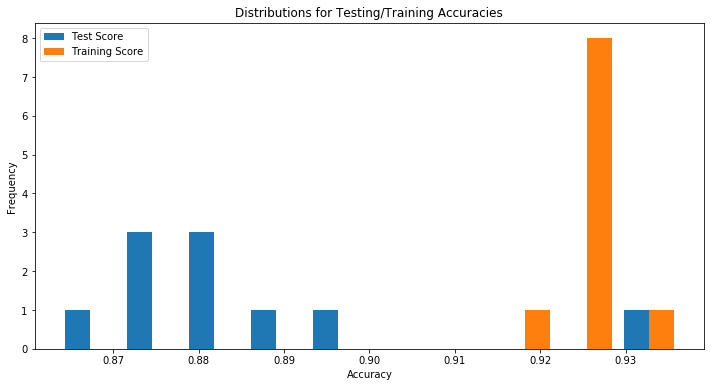

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist([test_score, train_score], label=["Test Score", "Training Score"])
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Distributions for Testing/Training Accuracies")
plt.legend()
plt.show()

#### Comments: 
Pretty good, maybe a bit of overfitting since there's high accuracy for training v. testing sets. 

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

### Answer to 4.4.1:

In [12]:
model.fit(X_ta, target_values) # retraining model on whole dataset 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
# creating a team alliance representation of the ambiguous characters

def get_ambig_alliance_matrix():
    targ_array = []
    sort_vec = []
    team_matrix = []
    
    for faction in ["ambiguous"]: # for each faction
        for char in os.listdir("../data/%s" % faction): # for each character in faction
            char = char[:-4] # remove .txt file extension
            
            team_vec = get_teams_vector(char, verbose=False)
            if sum(team_vec) != 0:
                team_matrix.append(team_vec)
                targ_array.append(char) # target array            
            
    # sort the matrix by character name
    team_matrix = np.matrix(team_matrix)
    team_matrix = team_matrix[np.argsort(targ_array, axis=0)]
    
    # sort target array
    targ_array.sort()
    
    return targ_array, team_matrix, sort_vec

In [14]:
# getting the ambiguous characters target matrix and the ambiguous character matrix
ambig_target, ambig_matrix, sort_vec = get_ambig_alliance_matrix() 

In [15]:
ambig_mt = np.array(ambig_matrix)
villain_prob = model.predict_proba(ambig_mt) # estimating the probability that each character is a villain 

heroness = []

for i in range(len(villain_prob)):
    heroness.append(villain_prob[i][0])

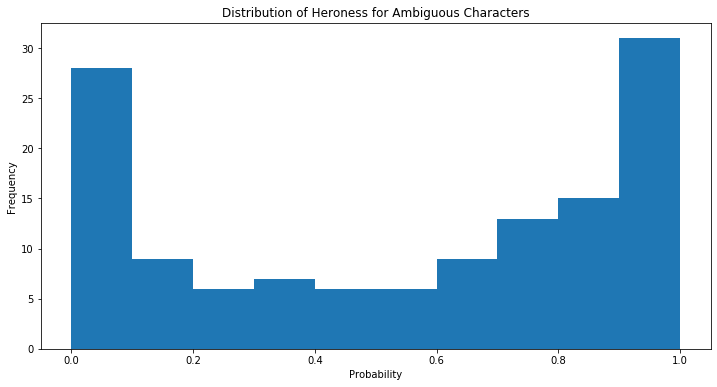

In [16]:
plt.figure(figsize=(12,6))
plt.hist(heroness) # visualizing the "heroness" distribution for all characters 
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Heroness for Ambiguous Characters")
plt.show()

#### Comments:
There are far more characters that have high probabilities for heroness meaning that many of these ambiguous characters aren't actually seen as ambiguous.

### Week 5

>**Ex. 5.1.3**: Print the maximum entropy path of a decision tree.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as their weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.3.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How splits are there? Do you notice anything interesting about the final splits? Why do we choose to stop splitting before `data` get smaller than 5?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of the order of splits you just printed (a comment is fine)?

### Week 6

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

> **Ex: 6.2.7**: Let's make a nice plot of the network.I built a Python library called Netwulf (go `pip install netwulf`) that allows you to interactively plot networks in Python. Go ahead and produce a beautiful looking network using that! Comment on what you see.